In [1]:
import json
#Pandas for saving datasets
import pandas as pd
#matplotlib for rendering
import matplotlib.pyplot as plt
#numpy for handeling matrix operations
import numpy as np
#time, to, well... keep track of time
import time
#iPython display for making sure we can render the frames
from IPython import display
#seaborn for rendering
import seaborn
import os
from matplotlib import pyplot as plt
import seaborn as sns 
from matplotlib.lines import Line2D
sns.set(style = 'white', context='talk', font_scale=1, rc={"lines.linewidth": 2})

# Directories

In [9]:
behav_dir = '../../data/behavioral/' ## location of behavioral data 

In [15]:
file_list = sorted(os.listdir(behav_dir))[1:]
subset_files = file_list[2:15] + file_list[16:-2]

In [16]:
subset_files

['sub-004_behav.npy',
 'sub-005_behav.npy',
 'sub-006_behav.npy',
 'sub-007_behav.npy',
 'sub-008_behav.npy',
 'sub-009_behav.npy',
 'sub-010_behav.npy',
 'sub-012_behav.npy',
 'sub-013_behav.npy',
 'sub-014_behav.npy',
 'sub-015_behav.npy',
 'sub-016_behav.npy',
 'sub-017_behav.npy',
 'sub-019_behav.npy',
 'sub-020_behav.npy',
 'sub-021_behav.npy',
 'sub-022_behav.npy',
 'sub-023_behav.npy',
 'sub-024_behav.npy',
 'sub-025_behav.npy',
 'sub-026_behav.npy',
 'sub-027_behav.npy',
 'sub-028_behav.npy',
 'sub-029_behav.npy',
 'sub-030_behav.npy',
 'sub-031_behav.npy',
 'sub-032_behav.npy',
 'sub-033_behav.npy',
 'sub-034_behav.npy',
 'sub-035_behav.npy',
 'sub-036_behav.npy',
 'sub-037_behav.npy',
 'sub-038_behav.npy',
 'sub-039_behav.npy',
 'sub-040_behav.npy',
 'sub-041_behav.npy']

In [17]:
print(f'num subs: {len(subset_files)} listed as {subset_files[0]}')

num subs: 36 listed as sub-004_behav.npy


# Functions

In [18]:
def num_bpress(arr):
    if arr == -1:
        #print('no bpress!')
        return 0
    else: 
        return len(arr)

## get button press counts

In [19]:
run_dic = {}
mov_dic = {}
cur_run_dic = {}
movies = ['shrek', 'sherlock', 'brushing', 'office', 'cake', 'oragami']
num_runs = 4

for movie in movies:
    print("MOVIE:", movie)
    run_dic = {}
    
    for run in range(1, num_runs + 1):
        print(f'run{run}')
        external_run = []
        internal_run = []
        cur_run_dic = {}
        
        for ind, sub_file in enumerate(subset_files):
            sub = sub_file[:7]
            sub_dic = np.load(behav_dir + sub + '_behav.npy', allow_pickle=True).item()
            
            if movie in sub_dic['External']:
                bpress_arr = sub_dic['External'][movie]['run-' + str(run)]['bpress']
                external_run.append(num_bpress(bpress_arr))
            elif movie in sub_dic['Internal']:
                bpress_arr = sub_dic['Internal'][movie]['run-' + str(run)]['bpress']
                internal_run.append(num_bpress(bpress_arr))
            else:
                print(f'check {sub}!')

        # create a dictionary of bpress counts for the internal and external run 1s for all subs 
        cur_run_dic['External'] = external_run
        cur_run_dic['Internal'] = internal_run
        print(f'external: {external_run} internal: {internal_run}')
        
        ## create a dictionary for the current run
        run_dic['run-' + str(run)] = cur_run_dic
    
    ## save for the current movie
    mov_dic[movie] = run_dic
    print()


MOVIE: shrek
run1
external: [5, 1, 0, 0, 5, 3, 7, 0, 2, 1, 0, 5, 0, 1, 2, 1, 0, 1, 4] internal: [2, 2, 9, 10, 5, 0, 10, 9, 11, 19, 0, 5, 3, 19, 12, 0, 4]
run2
external: [3, 1, 1, 1, 9, 3, 10, 0, 0, 3, 0, 5, 0, 3, 8, 3, 1, 1, 3] internal: [3, 0, 4, 5, 5, 0, 5, 4, 12, 15, 1, 4, 2, 11, 9, 0, 0]
run3
external: [5, 1, 3, 1, 12, 3, 6, 0, 2, 1, 1, 5, 2, 4, 4, 2, 1, 3, 4] internal: [3, 1, 3, 2, 3, 0, 8, 1, 5, 19, 2, 8, 3, 15, 11, 0, 0]
run4
external: [4, 0, 4, 2, 13, 3, 7, 0, 3, 3, 2, 3, 5, 3, 8, 0, 2, 5, 1] internal: [2, 2, 1, 1, 1, 0, 7, 0, 12, 14, 2, 8, 1, 10, 7, 0, 5]

MOVIE: sherlock
run1
external: [7, 3, 0, 0, 3, 1, 6, 0, 0, 1, 0, 2, 0, 0, 3, 0, 0, 0, 3] internal: [4, 4, 10, 16, 5, 0, 15, 3, 7, 20, 1, 9, 3, 19, 14, 0, 14]
run2
external: [2, 2, 1, 0, 4, 0, 8, 0, 2, 2, 2, 4, 0, 0, 1, 0, 1, 3, 2] internal: [4, 1, 5, 5, 5, 0, 10, 1, 6, 14, 0, 7, 3, 13, 10, 0, 1]
run3
external: [4, 4, 0, 2, 6, 3, 7, 0, 1, 2, 2, 5, 0, 6, 3, 3, 0, 5, 6] internal: [5, 3, 6, 1, 0, 0, 6, 1, 4, 12, 3, 13, 3, 12, 11

# plot per video

<Figure size 1800x1200 with 0 Axes>

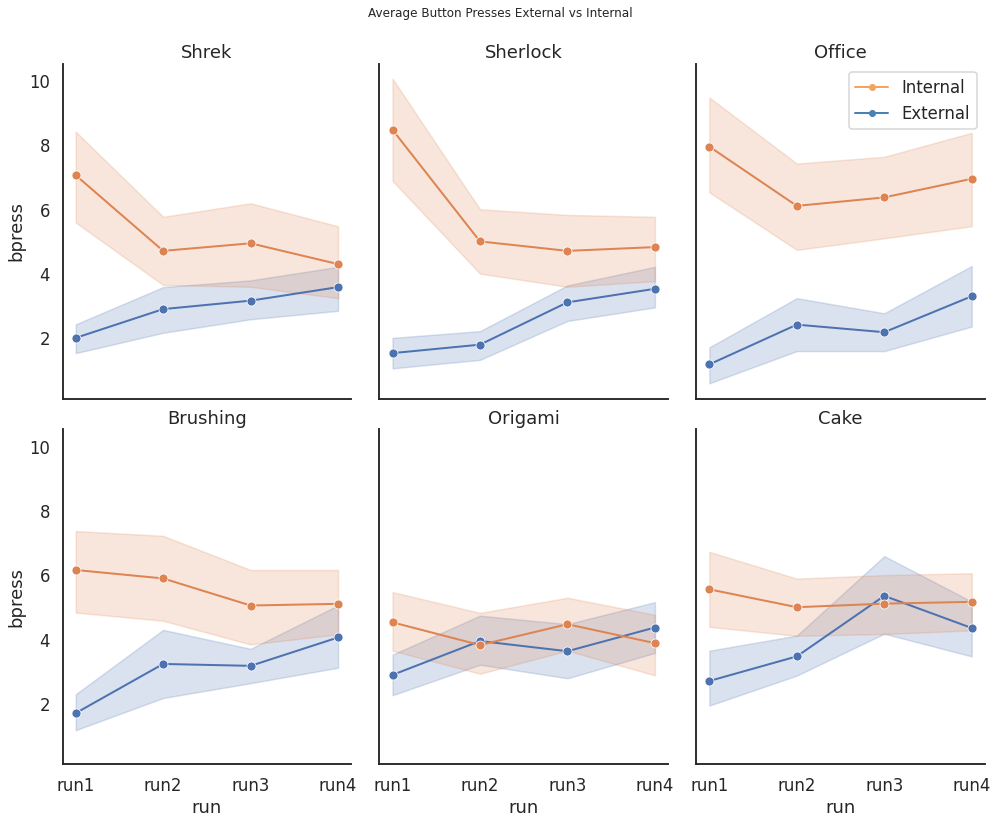

<Figure size 1800x1200 with 0 Axes>

In [20]:
colz = 3
rowz = 2
tot_plotz = 9
col_len = 10
bin_size = 5
mov_nam = 'brushing'
conds = ['External', 'Internal']
movie_labels = ['shrek', 'sherlock', 'office', 'brushing', 'oragami', 'cake']
run_lab = ['run1', 'run2', 'run3', 'run4']
run_nums = np.array([1,2,3,4])
fig, axs = plt.subplots(rowz, colz, figsize = (14,12), sharex=True, sharey=True)
plt.setp(axs, xticks=run_nums, xticklabels=run_lab)



legend_elements = [
    Line2D([0], [0], marker='o', color='sandybrown', label='Internal', markersize=6),
    Line2D([0], [0], marker='o', color='steelblue', label='External', markersize=6)
]

for ind, mov_nam in enumerate(movie_labels):
    ## External ## 
    run_list_ex = [mov_dic[mov_nam][run_num]['External'] for run_num in mov_dic[mov_nam]]
    x_var = np.repeat(run_nums, len(run_list_ex[0]))
    y_var = np.concatenate(np.asarray(run_list_ex))
    ex_df = pd.DataFrame(np.column_stack((x_var, y_var)), columns=['run', 'bpress'])
    
    ## Internal ## 
    run_list_in = [mov_dic[mov_nam][run_num]['Internal'] for run_num in mov_dic[mov_nam]]
    x_var = np.repeat(run_nums, len(run_list_in[0]))
    y_var = np.concatenate(np.asarray(run_list_in))
    in_df = pd.DataFrame(np.column_stack((x_var, y_var)), columns=['run', 'bpress'])

    # set labels #
    if int(ind / 3) == 0 and int(ind % 3) == 2:
        sns.lineplot(data=ex_df, x='run', y='bpress', ax=axs[int(ind / 3), int(ind % 3)], marker='o', ci=68)
        sns.lineplot(data=in_df, x='run', y='bpress', ax=axs[int(ind / 3), int(ind % 3)], marker='o', ci=68)
        # Add custom legend with different colors and markers
        axs[int(ind / 3), int(ind % 3)].legend(handles=legend_elements, loc='upper right')
    else:
        sns.lineplot(data=ex_df, x='run', y='bpress', ax=axs[int(ind / 3), int(ind % 3)], marker='o', ci=68)
        sns.lineplot(data=in_df, x='run', y='bpress', ax=axs[int(ind / 3), int(ind % 3)], marker='o', ci=68)
    if mov_nam == 'oragami':
        axs[int(ind / 3), int(ind % 3)].set_title('Origami')
    else:
        axs[int(ind / 3), int(ind % 3)].set_title(mov_nam.capitalize())
    
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle(f'Average Button Presses External vs Internal')
sns.despine();
plt.figure(dpi=300)

# plot high vs low salience

In [21]:
high_movies =['shrek', 'office', 'sherlock']
low_movies = ['brushing', 'oragami', 'cake']
movie_labels = ['shrek', 'sherlock', 'office', 'brushing', 'oragami', 'cake']


In [23]:
result = {'high': {}, 'low': {}}

for movie, runs in mov_dic.items():
    category = 'high' if movie in high_movies else 'low'
    
    if category not in result:
        result[category] = {}

    for run, values in runs.items():
        if run not in result[category]:
            result[category][run] = {'External': [], 'Internal': []}
        
        for key, value in values.items():
            result[category][run][key].extend(value)

#print(result)

In [24]:
for ind, mov_cond in enumerate(result):
    ## External ## 
    run_list_ex = [result[mov_cond][run_num]['External'] for run_num in result[mov_cond]]
    #x_var = np.repeat(run_nums, len(run_list_ex[0]))
    #y_var = np.concatenate(np.asarray(run_list_ex))
    #ex_df = pd.DataFrame(np.column_stack((x_var, y_var)), columns=['run', 'bpress'])

<Figure size 1800x1200 with 0 Axes>

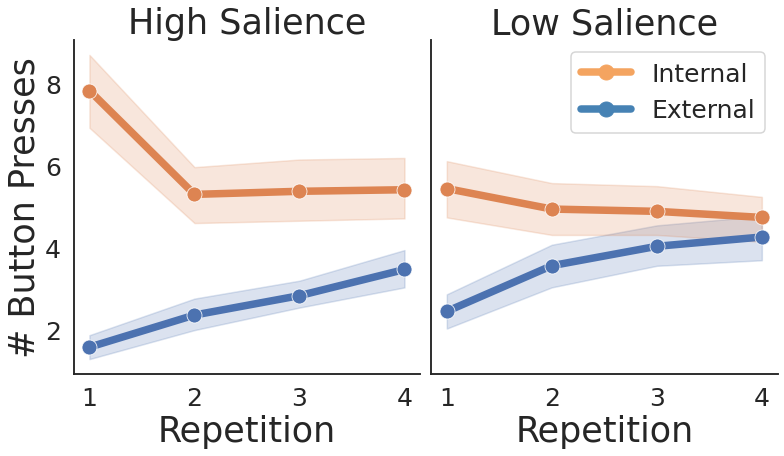

<Figure size 1800x1200 with 0 Axes>

In [26]:
colz = 2
rowz = 1
tot_plotz = 2
col_len = 10
bin_size = 5
mov_nam = 'brushing'
conds = ['External', 'Internal']
movie_labels = ['shrek', 'sherlock', 'office', 'brushing', 'oragami', 'cake']
run_lab = ['Run 1', 'Run 2', 'Run 3', 'Run 4']
run_lab = [1, 2, 3, 4]
run_nums = np.array([1,2,3,4])
fig, axs = plt.subplots(rowz, colz, figsize = (11,7), sharex=True, sharey=True)
#fig, axs = plt.subplots(rowz, colz, figsize = (13,7), sharex=True, sharey=True)
plt.setp(axs, xticks=run_nums, xticklabels=run_lab)



legend_elements = [
    Line2D([0], [0], marker='o', color='sandybrown', label='Internal',linewidth=7.5, markersize=15),
    Line2D([0], [0], marker='o', color='steelblue', label='External', linewidth=7.5, markersize=15)
]

for ind, mov_cond in enumerate(result):
    ## External ## 
    run_list_ex = [result[mov_cond][run_num]['External'] for run_num in result[mov_cond]]
    x_var = np.repeat(run_nums, len(run_list_ex[0]))
    y_var = np.concatenate(np.asarray(run_list_ex))
    ex_df = pd.DataFrame(np.column_stack((x_var, y_var)), columns=['run', 'bpress'])
    
    ## Internal ## 
    run_list_in = [result[mov_cond][run_num]['Internal'] for run_num in result[mov_cond]]
    x_var = np.repeat(run_nums, len(run_list_in[0]))
    y_var = np.concatenate(np.asarray(run_list_in))
    in_df = pd.DataFrame(np.column_stack((x_var, y_var)), columns=['run', 'bpress'])

    # set labels #
    if int(ind % 2) == 1:
        sns.lineplot(data=ex_df, x='run', y='bpress', ax=axs[int(ind % 2)], marker='o', ci=68, linewidth=7.5, markersize=15)
        sns.lineplot(data=in_df, x='run', y='bpress', ax=axs[int(ind % 2)], marker='o', ci=68, linewidth=7.5, markersize=15)
        # Add custom legend with different colors and markers
        axs[int(ind % 2)].legend(handles=legend_elements, loc='upper right',  fontsize=25)
    else:
        sns.lineplot(data=ex_df, x='run', y='bpress', ax=axs[int(ind % 2)], marker='o', ci=68, linewidth=7.5, markersize=15)
        sns.lineplot(data=in_df, x='run', y='bpress', ax=axs[int(ind % 2)], marker='o', ci=68, linewidth=7.5, markersize=15)
    if mov_nam == 'oragami':
        axs[int(ind % 2)].set_title('Origami')
    else:
        axs[int(ind % 2)].set_title(mov_cond.capitalize() + ' Salience', fontsize=35)
        
        
    axs[int(ind % 2)].set_ylabel('# Button Presses', fontsize=35)
    axs[int(ind % 2)].tick_params(axis='x', labelsize=25)
    axs[int(ind % 2)].tick_params(axis='y', labelsize=25)
    axs[int(ind % 2)].set_xlabel('Repetition', fontsize=35)
    
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#fig.suptitle(f'Average Button Presses High vs Low Salience')
sns.despine();
plt.savefig('High-Low_Sal.png')
plt.figure(dpi=300)

## one movie plotting

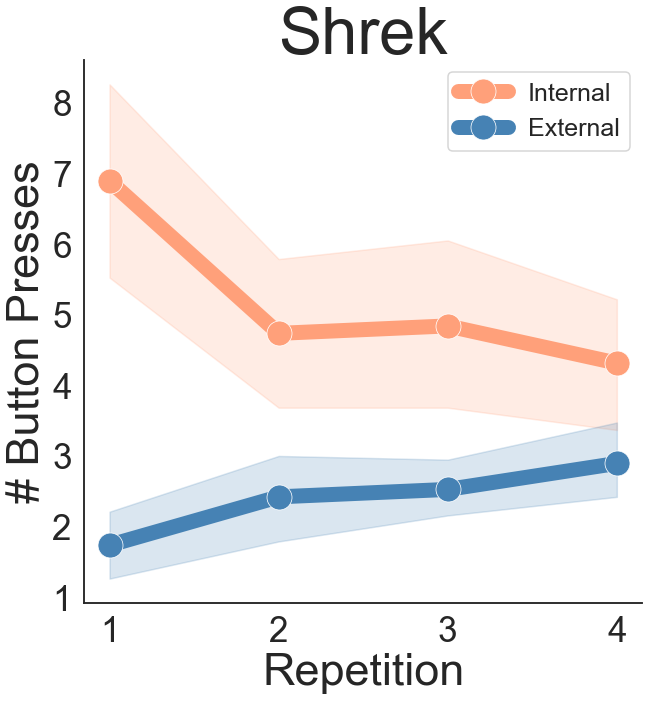

<Figure size 1800x1200 with 0 Axes>

In [12]:
## get movie data
mov_nam = 'shrek'

s1 = 55
s2 = 65

## External ## 
run_list_ex = [mov_dic[mov_nam][run_num]['External'] for run_num in mov_dic[mov_nam]]
x_var = np.repeat(run_nums, len(run_list_ex[0]))
y_var = np.concatenate(np.asarray(run_list_ex))
ex_df = pd.DataFrame(np.column_stack((x_var, y_var)), columns=['run', 'bpress'])

## Internal ## 
run_list_in = [mov_dic[mov_nam][run_num]['Internal'] for run_num in mov_dic[mov_nam]]
x_var = np.repeat(run_nums, len(run_list_in[0]))
y_var = np.concatenate(np.asarray(run_list_in))
in_df = pd.DataFrame(np.column_stack((x_var, y_var)), columns=['run', 'bpress'])
    
    
## plot
plt.figure(figsize=(10, 10))
sns.lineplot(data=in_df, x='run', y='bpress', color = 'lightsalmon', marker='o', ci=68, linewidth=15, markersize=25)
sns.lineplot(data=ex_df, x='run', y='bpress',  color = 'steelblue', marker='o', ci=68, linewidth=15, markersize=25)


# Customize the plot
plt.xlabel('Repetition', fontsize=45)
plt.ylabel('# Button Presses', fontsize=45)
plt.title(mov_nam.capitalize(), fontsize=s2)

plt.xticks([1, 2, 3, 4],  fontsize=35)  # Set the x-axis ticks to [1, 2, 3, 4]
#plt.xticks([1, 2, 3, 4], ['Rep 1', 'Rep 2', 'Rep 3', 'Rep 4'],  fontsize=35)  # Set the x-axis ticks to [1, 2, 3, 4]

plt.yticks(fontsize=35)
plt.legend(labels=['Internal', 'External'], fontsize=25)

sns.despine()
plt.savefig(f'{mov_nam}.png', dpi=300)
plt.figure(dpi=300)

plt.show()

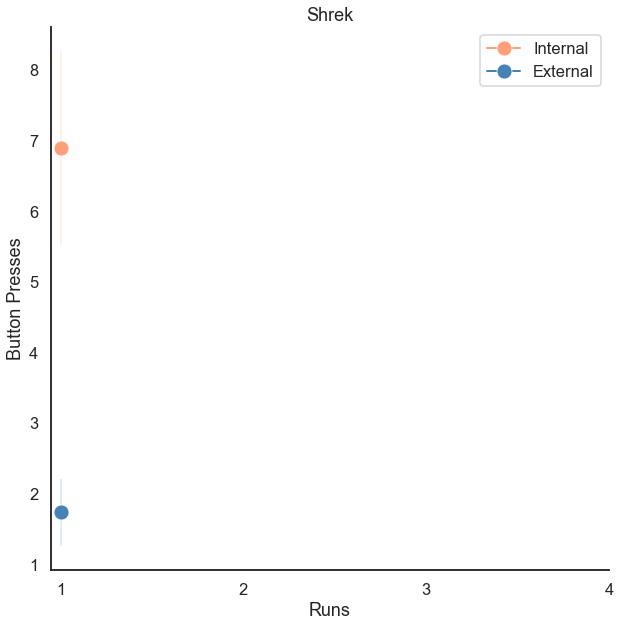

<Figure size 1800x1200 with 0 Axes>

In [123]:
## get movie data
mov_nam = 'shrek'
plt.rcParams['lines.markersize'] = 15

## External ## 
run_list_ex = [mov_dic[mov_nam][run_num]['External'] for run_num in mov_dic[mov_nam]]
x_var = np.repeat(run_nums, len(run_list_ex[0]))
y_var = np.concatenate(np.asarray(run_list_ex))
ex_df = pd.DataFrame(np.column_stack((x_var, y_var)), columns=['run', 'bpress'])

## Internal ## 
run_list_in = [mov_dic[mov_nam][run_num]['Internal'] for run_num in mov_dic[mov_nam]]
x_var = np.repeat(run_nums, len(run_list_in[0]))
y_var = np.concatenate(np.asarray(run_list_in))
in_df = pd.DataFrame(np.column_stack((x_var, y_var)), columns=['run', 'bpress'])
    
    
# partial df #
ins = in_df[in_df['run'] == 1]
ext = ex_df[ex_df['run'] == 1]
    
## plot
plt.figure(figsize=(10, 10))
sns.lineplot(data=ins, x='run', y='bpress', color = 'lightsalmon', marker='o', ci=68)
sns.lineplot(data=ext, x='run', y='bpress',  color = 'steelblue', marker='o', ci=68)


# Customize the plot
plt.xlabel('Runs')
plt.ylabel('Button Presses')
plt.title(mov_nam.capitalize())
plt.xticks([1, 2, 3, 4])  # Set the x-axis ticks to [1, 2, 3, 4]
plt.legend(labels=['Internal', 'External'])

sns.despine()

plt.figure(dpi=300)
plt.show()

# stats 

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind

## Anova

In [28]:
mov_cond = 'low'

In [29]:

## External ## 
run_list_ex = [result[mov_cond][run_num]['External'] for run_num in result[mov_cond]]
x_var = np.repeat(run_nums, len(run_list_ex[0]))
y_var = np.concatenate(np.asarray(run_list_ex))
ex_df = pd.DataFrame(np.column_stack((x_var, y_var)), columns=['run', 'bpress'])

## Internal ## 
run_list_in = [result[mov_cond][run_num]['Internal'] for run_num in result[mov_cond]]
x_var = np.repeat(run_nums, len(run_list_in[0]))
y_var = np.concatenate(np.asarray(run_list_in))
in_df = pd.DataFrame(np.column_stack((x_var, y_var)), columns=['run', 'bpress'])

In [30]:
ex_df['Condition'] = 'External'
in_df['Condition'] = 'Internal'
stacked_df = pd.concat([ex_df, in_df], ignore_index=True)

In [133]:
# Fit the ANOVA model
model = ols('bpress ~ C(run) * C(Condition)', data=stacked_df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                          sum_sq     df          F    PR(>F)
C(run)                 21.164474    3.0   0.590798  0.621295
C(Condition)          209.388158    1.0  17.534962  0.000034
C(run):C(Condition)    94.778509    3.0   2.645704  0.048637
Residual             5349.649123  448.0        NaN       NaN


In [71]:
# get bpress means
np.nanmean(result['high']['run-3']['Internal'])
#np.mean(mov_dic['sherlock']['run-1']['External'])

4.964912280701754

### Regression

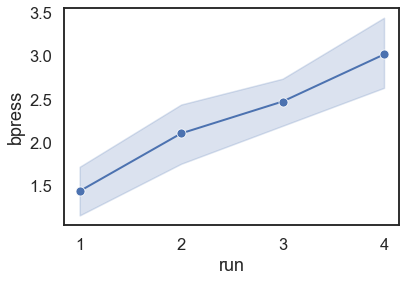

In [42]:
sns.lineplot(data=ex_df, x='run', y='bpress', marker='o', ci=68)


In [112]:
## set above in the anova section ## 
mat = in_df #in_df

In [113]:


# Define the independent variable (predictor)
X = mat['run']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Define the dependent variable (response)
y = mat['bpress']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 bpress   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7604
Date:                Wed, 10 Apr 2024   Prob (F-statistic):              0.384
Time:                        14:15:28   Log-Likelihood:                -623.03
No. Observations:                 228   AIC:                             1250.
Df Residuals:                     226   BIC:                             1257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1667      0.606      8.525      0.0

### t-test

In [124]:
# Between runs #
group1 = result['low']['run-1']['Internal']
group2 = result['low']['run-4']['Internal']

# across all conds # 
#group1 = np.hstack(([result['low'][f'run-{i}']['Internal'] for i in range(1,5)]))
#group2 = np.hstack(([result['low'][f'run-{i}']['External'] for i in range(1,5)]))

# between high and low salience # 
#group1 = np.hstack(([result['high'][f'run-{i}']['Internal'] for i in range(1,5)]))
#group2 = np.hstack(([result['low'][f'run-{i}']['Internal'] for i in range(1,5)]))

In [125]:
# Perform the independent t-test
t_statistic, p_value = ttest_ind(group1, group2)

# Assuming you have the sizes of the two groups: n1 and n2
n1 = len(group1)
n2 = len(group2)

# Calculate the degrees of freedom
degrees_of_freedom = n1 + n2 - 2


# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("Degrees of Freedom:", degrees_of_freedom)

T-statistic: 0.904401059755189
P-value: 0.3677240461758047
Degrees of Freedom: 112


In [81]:
# Assuming you have the sizes of the two groups: n1 and n2
n1 = len(group1)
n2 = len(group2)

# Calculate the degrees of freedom
degrees_of_freedom = n1 + n2 - 2
print("Degrees of Freedom:", degrees_of_freedom)

Degrees of Freedom: 112


#  get bpress data for t-tests

In [31]:
data = []
conditions = ['External', 'Internal']
for sub_file in subset_files:
    sub = sub_file[:7]
    sub_dic = np.load(behav_dir + sub + '_behav.npy', allow_pickle=True).item()
    for movie in movies:
        for cond in conditions:
            #print(f'run{run}')
            for run in range(1, num_runs + 1):
                try:
                    prss = sub_dic[cond][movie][f'run-' + str(run)]['bpress']
                    data.append([sub, movie, f'run-{str(run)}', cond, num_bpress(prss)])
                except:
                    continue

In [97]:
df = pd.DataFrame(data, columns = ['subject', 'movie', 'run number', 'condition', 'num_bpress'])
df.head()

,subject,movie,run number,condition,num_bpress
0,sub-002,shrek,run-1,Internal,0
1,sub-002,shrek,run-2,Internal,2
2,sub-002,shrek,run-3,Internal,1
3,sub-002,shrek,run-4,Internal,3
4,sub-002,sherlock,run-1,Internal,2


In [98]:
df.to_csv('all_bpress_data.csv', index=False)